In [1]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np
import j_py_sad_correlation as jps

from scipy.signal import find_peaks
from scipy import signal
from scipy.optimize import curve_fit

import tifffile as tf

In [2]:
def v_fitting(y_1, y_2, y_3):
    # Fit using a symmetric 'V' function, to find the interpolated minimum for three datapoints y_1, y_2, y_3,
    # which are considered to be at coordinates x=-1, x=0 and x=+1
    if y_1 < y_2 or y_3 < y_2:
        return 0, 0

    if y_1 > y_3:
        x = 0.5 * (y_1 - y_3) / (y_1 - y_2)
        y = y_2 - x * (y_1 - y_2)
    else:
        x = 0.5 * (y_1 - y_3) / (y_3 - y_2)
        y = y_2 + x * (y_3 - y_2)


    return x, y

Setting source to D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif
Loading reference sequence from D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\ref_seq.tif
Getting SADs
Getting phases
Setting source to D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif
Loading reference sequence from D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\ref_seq.tif
Getting SADs
Getting phases


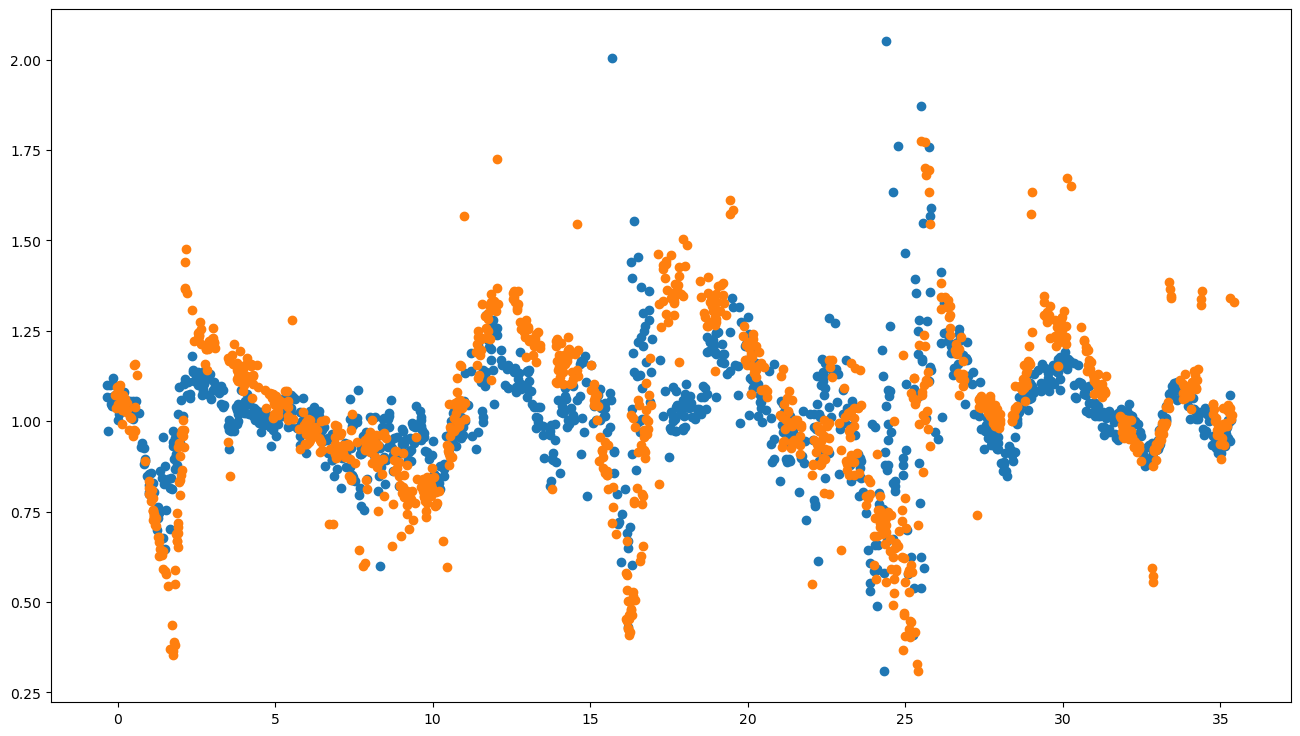

In [3]:
plt.figure(figsize = (16,9))
oog = OG.BasicOpticalGating().default()
"""oog.sequence_manager.set_source(r"E:\data\my data\Arrhythmic imaging April 2024\2024-04-05 17.38.02 vid pre-caffeine 3\Allied Vision Technologies GS650 0001f61c\*tif")
oog.settings["pi_space"] = False
oog.settings["include_reference_frames"] = False"""
oog.settings["pi_space"] = False
oog.run()

plt.scatter(oog.phases[np.where(oog.delta_phases > 0)], oog.delta_phases[np.where(oog.delta_phases > 0)])

oog = OG.BasicOpticalGating().default()
oog.settings["pi_space"] = False
oog.settings["subframe_method"] = "parabola"
oog.run()

plt.scatter(oog.phases[np.where(oog.delta_phases > 0)], oog.delta_phases[np.where(oog.delta_phases > 0)])
plt.show()

Setting source to D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif
Loading reference sequence from D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\ref_seq.tif
Getting SADs
Getting phases


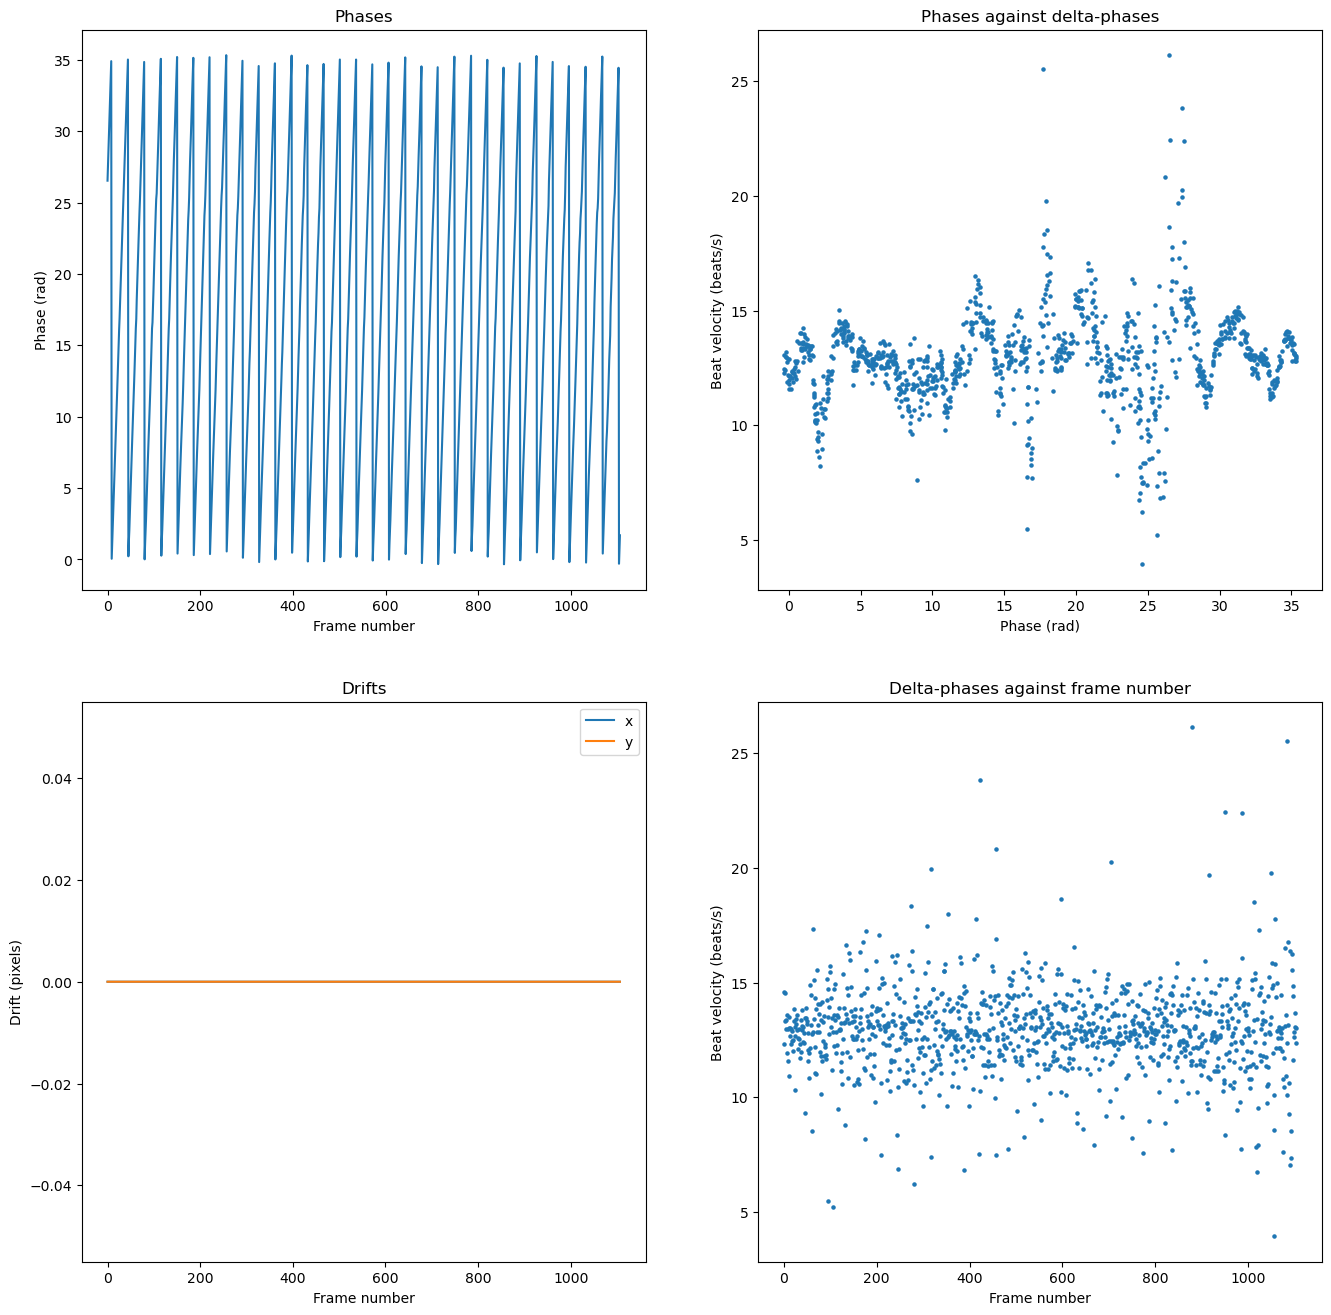

In [4]:
oog = OG.BasicOpticalGating().default()
"""oog.sequence_manager.set_source(r"E:\data\my data\Arrhythmic imaging April 2024\2024-04-05 17.38.02 vid pre-caffeine 3\Allied Vision Technologies GS650 0001f61c\*tif")
oog.settings["pi_space"] = False
oog.settings["include_reference_frames"] = False"""
oog.settings["pi_space"] = False
oog.run()

oog.plot_summary()

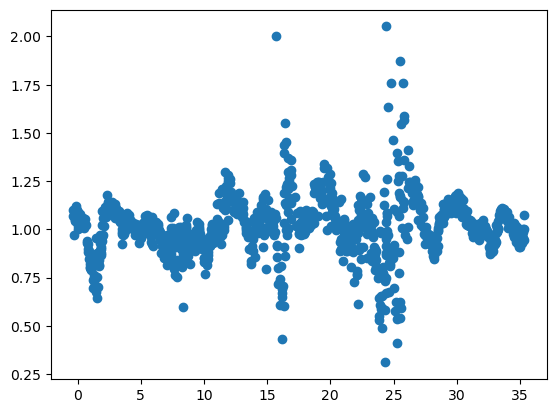

In [5]:
plt.scatter(oog.phases[np.where(oog.delta_phases > 0)], oog.delta_phases[np.where(oog.delta_phases > 0)])

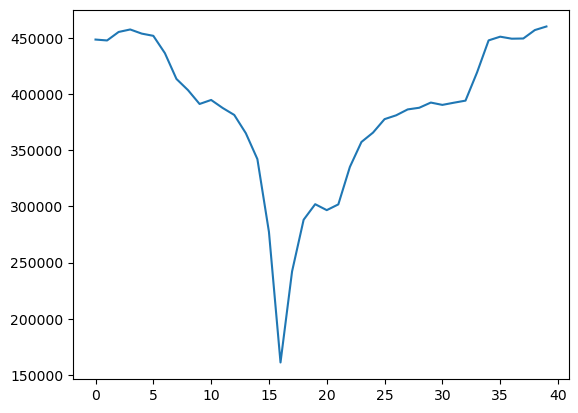

In [6]:
plt.plot(oog.sads[59])

In [7]:
# fit a parabola using curve_fit to find minima
def u_fit(x, a, b, c):
    return a * x**2 + b * x + c

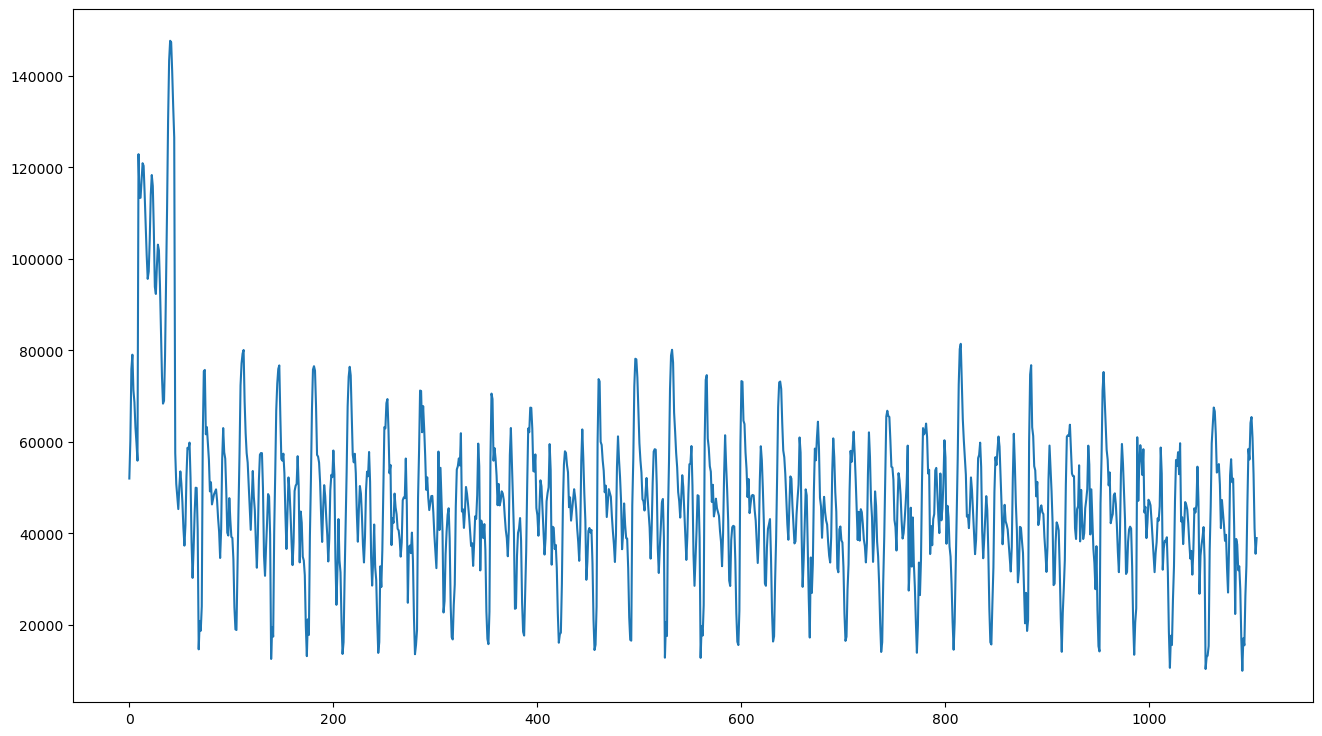

1091


In [8]:
flatness = []
for sad in oog.sads:
    minima = np.argmin(sad[2:-2]) + 2
    flatness.append(np.std(sad[minima-2:minima+3]))

plt.figure(figsize = (16,9))
plt.plot(flatness)
plt.show()

print(np.argmin(flatness))

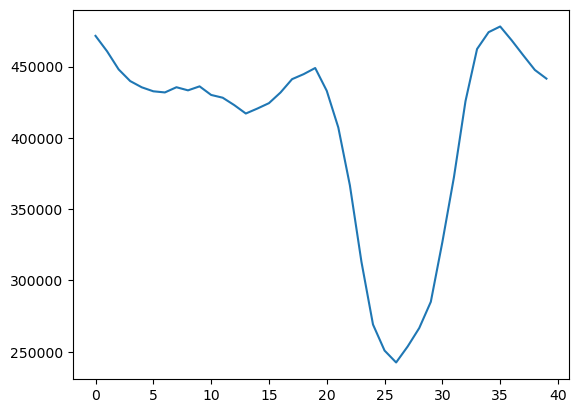

In [9]:
plt.plot(oog.sads[1091])

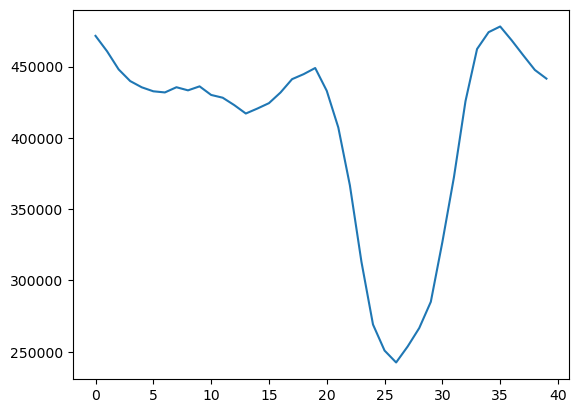

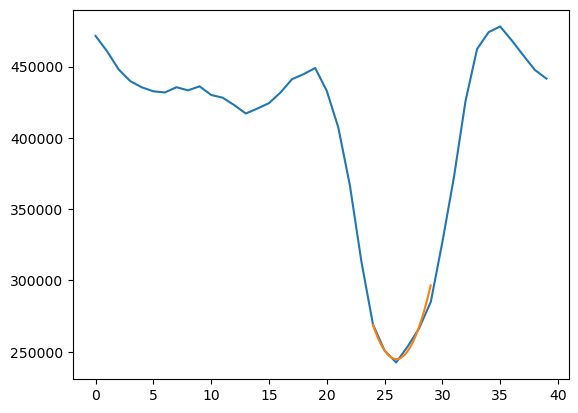

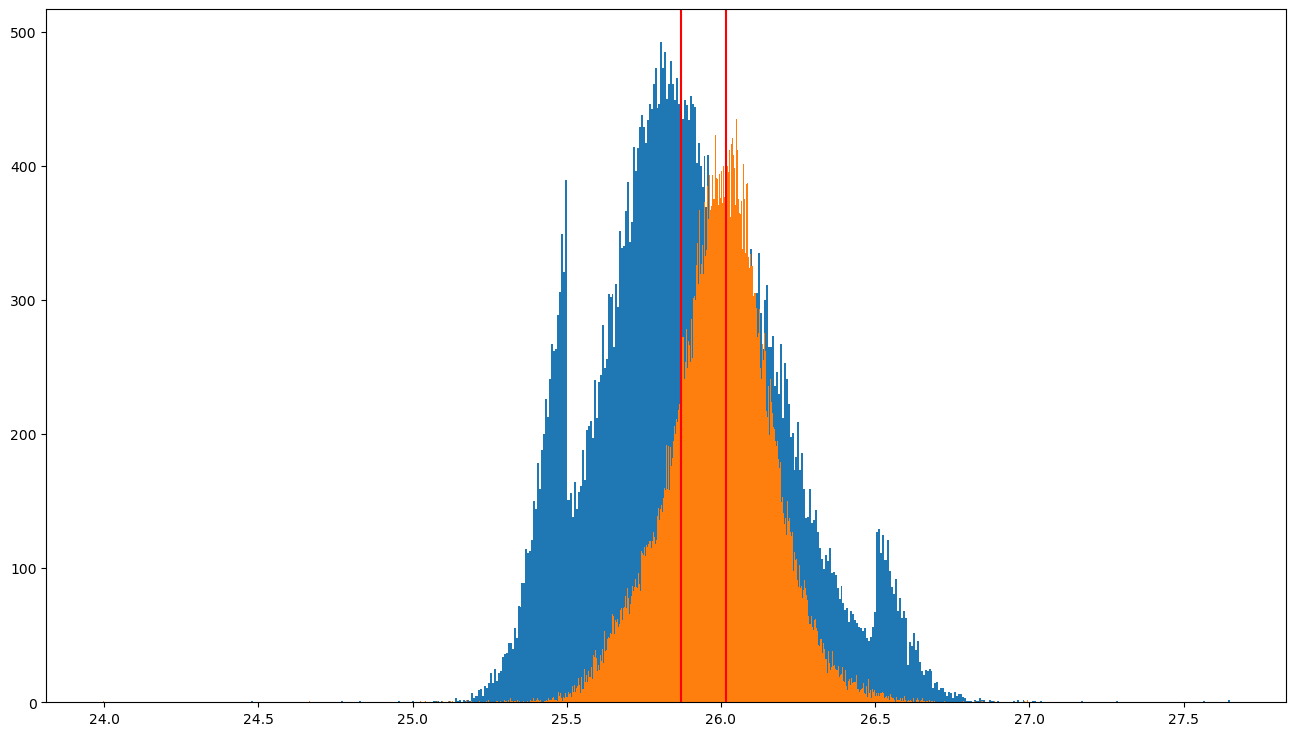

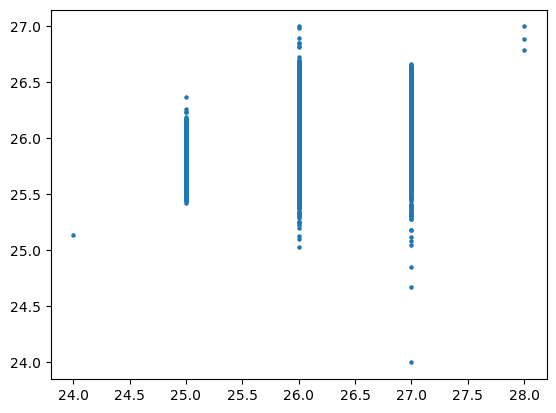

In [10]:
sad = oog.sads[59]
sad = oog.sads[1091]

plt.plot(sad)
plt.show()

offsets = []
offsets_parabola = []
minimas = []
for i in range(50000):

    # Get true minima
    minima = np.argmin(sad[2:-2]) + 2
    x, y = v_fitting(sad[minima-1], sad[minima], sad[minima+1])

    true_minima = minima + x
    
    fit = curve_fit(u_fit, np.arange(minima-2, minima+3), sad[minima-2:minima+3])
    x_parabola_true = -fit[0][1] / (2 * fit[0][0])

    if i == 0:
        plt.plot(sad)
        plt.plot(np.arange(minima-2, minima+3,0.01), u_fit(np.arange(minima-2, minima+3,0.01), *fit[0]))
        plt.show()

    # Add noise to the sad
    ys = sad + np.random.normal(0, 5000, len(sad))

    # Find minima using v_fitting
    minima = np.argmin(ys[2:-2]) + 2

    x, y = v_fitting(ys[minima-1], ys[minima], ys[minima+1])

    fit, _ = curve_fit(u_fit, np.arange(minima-2, minima+3), ys[minima-2:minima+3])
    x_parabola = -fit[1] / (2 * fit[0])

    # Save to arrays
    offsets.append(minima + x)
    offsets_parabola.append(x_parabola)
    minimas.append(minima)

plt.figure(figsize = (16,9))
plt.hist(offsets, bins = 500)
plt.axvline(true_minima, color = "red")
#plt.show()

plt.hist(offsets_parabola, bins = 1000)
plt.axvline(x_parabola_true, color = "red")
plt.show()

plt.scatter(minimas, offsets_parabola, s = 5)